# Generatoren in Python  
**Quellen:**  
https://www.python-kurs.eu/python3_generatoren.php  
https://lernenpython.com/generator/



An der Oberfläche sehen Generatoren in Python wie Funktionen aus, aber es gibt sowohl einen syntaktischen als auch einen semantischen Unterschied. Ein Unterscheidungsmerkmal sind die *yield-Anweisungen.*  
Die yield-Anweisung verwandelt eine Funktiondefinition in einen Generator.  
Ein Generator ist eine Funktion, die ein Generatorobjekt zurückgibt. Dieses Generatorobjekt kann als eine Funktion angesehen werden, die anstelle eines einzelnen Objekts eine Folge von Ergebnissen erzeugt. Diese Folge von Werten wird durch Iteration darüber erzeugt, z. B. mit einer for-Schleife. Die Werte, auf denen iteriert werden kann, werden mithilfe der yield-Anweisung erstellt. Der von der yield-Anweisung erstellte Wert ist der Wert, der auf das yield-Schlüsselwort folgt. Die Ausführung des Codes wird beendet, wenn eine yield-Anweisung erreicht ist. Der Wert des Ausdrucks, der hinter yield folgt, wird zurückgegeben. Die Ausführung des Generators wird jetzt unterbrochen. Sobald next erneut für das Generatorobjekt aufgerufen wird, nimmt die Generatorfunktion die Ausführung direkt nach der yield-Anweisung im Code wieder auf, in dem der letzte Aufruf erfolgt. Die Ausführung wird in dem Zustand fortgesetzt, in dem der Generator nach letzten yield verlassen wurde.  
Mit anderen Worten, alle lokalen Variablen sind noch vorhanden, da sie zwischen den Aufrufen automatisch gespeichert werden. Dies ist ein grundlegender Unterschied zu Funktionen: Funktionen beginnen ihre Ausführung immer am Anfang des Funktionskörpers, unabhängig davon, wo sie in früheren Aufrufen verlassen worden sind. Sie haben keine statischen oder dauerhaften Werte. Der Code eines Generators kann mehr als eine yield-Anweisung enthalten, oder die yield-Anweisung befindet sich möglicherweise im Hauptteil einer Schleife. Wenn der Code eines Generators eine return-Anweisung enthält, wird die Ausführung mit einem StopIteration-Ausnahmefehler beendet, wenn dieser Code vom Python-Interpreter ausgeführt wird. Das Wort "Generator" wird manchmal mehrdeutig verwendet, um sowohl die Generatorfunktion selbst als auch die Objekte zu bezeichnen, die von einem Generator erzeugt ("generiert") werden.

Alles, was mit einem Generator gemacht werden kann, kann auch mit einem klassenbasierten Iterator implementiert werden. Der entscheidende Vorteil von Generatoren besteht jedoch darin, dass die Methoden **\_\_iter\_\_()** und **\_\_next()\_\_** automatisch erstellt werden. Generatoren bieten eine geeignete Möglichkeit, Daten zu erzeugen, die riesig oder sogar unendlich sind.

Das Folgende ist ein einfaches Beispiel für einen Generator, der verschiedene Städtenamen erzeugen kann.

Mit diesem Generator kann ein Generatorobjekt erstellt werden, das nacheinander die Städtenamen der yield-Anweisungen generiert.

In [ ]:
def stadt_generator():
    yield "Hamburg"
    yield "Konstanz"
    yield "Berlin"
    yield "Zürich"
    yield "Schaffhausen"
    yield "Stuttgart"

In [ ]:
stadt = stadt_generator()
next(stadt)

In [ ]:
next(stadt)

Wir haben einen Iterator erstellt, indem wir stadt_generator() aufgerufen haben:

In [ ]:
stadt = stadt_generator()
print(type(stadt))
print(next(stadt))
print(next(stadt))
print(next(stadt))
print(next(stadt))
print(next(stadt))
print(next(stadt))
print(next(stadt))

Wie wir sehen können, haben wir in der interaktiven Shell einen Iterator stadt generiert.  
Jeder Aufruf der Methode next(stadt) gibt eine andere Stadt zurück. Nachdem die letzte Stadt, d. h. Stuttgart, erstellt wurde, löst ein weiterer Aufruf von next(stadt) eine Ausnahme aus, die besagt, dass die Iteration gestoppt wurde, d. h. StopIteration.  
"Können wir einen Reset an einen Generator senden?" ist eine häufig gestellte Frage, damit die Iteration von vorne beginnen kann.  
Es gibt kein Reset, aber es ist möglich, ein neues Generatorobjekt zu erstellen, indem man erneut die Anweisung stadt = stast_generator() ausführen lässt. Obwohl die yield-Anweisung auf den ersten Blick wie die Return-Anweisung einer Funktion aussieht, können wir in diesem Beispiel sehen, dass es einen großen Unterschied gibt.  
Wenn wir im vorherigen Beispiel eine return-Anweisung anstelle eines yield hätten, wäre dies eine Funktion. Aber diese Funktion würde immer nur die erste Stadt, also "Hamburg" zurückliefern und niemals eine der anderen Städte, d. h. "Konstanz", "Berlin", "Zürich", "Schaffhausen" und "Stuttgart"

## Funktionsweise

Wie wir in der Einleitung dieses Kapitels ausgeführt haben, bieten die Generatoren eine komfortable Möglichkeit zum Generieren von Iteratoren. Deshalb werden sie als Generatoren bezeichnet.

Arbeitsweise:

- Ein Generator wird aufgerufen wie eine Funktion. Sein Rückgabewert ist ein Iterator, d. h. ein Generatorobjekt. Der Code des Generators wird zu diesem Zeitpunkt nicht ausgeführt.
- Der Iterator kann durch Aufrufen der next-Methode aufgerufen werden. Beim ersten Aufruf wird mit der ersten Codezeile des Iteratorobjektes begonnen. Der Code wird solange ausgeführt, bis eine yield-Anweisung erreicht wird.
- yield gibt den Wert des Ausdrucks zurück, der dem Schlüsselwort yield folgt. Beim nächsten Aufruf wird die Ausführung mit der Anweisung fortgesetzt, die auf die yield-Anweisung folgt, und die Variablen haben dieselben Werte wie beim vorherigen Aufruf.
- Der Iterator ist beendet, wenn der Generatorkörper vollständig durchgearbeitet worden ist oder wenn der Programmablauf auf eine return-Anweisung ohne Wert stößt.  

Wir werden dieses Verhalten im folgenden Beispiel veranschaulichen. Der Generator count erstellt einen Iterator, der eine Folge von Werten erstellt, indem er mit dem Startwert firstval zu zählen beginnt und den Wert von step als Inkrement für die Zählung verwendet:

In [ ]:
import time
def zahl(firstval=0, step=1):
    x = firstval
    while True:
        yield x
        x += step

In [ ]:
#zähler = zahl() # count beginnt mit 0
#for i in range(10):
#    print(next(zähler), end=", ")
start_wert = 2.1
step_wert = 0.3
print("\nNeuer Zähler:")
zähler = zahl(start_wert, step_wert)
for i in range(20):
    neue_wert = next(zähler)
    print(f"{neue_wert:2.2f}", end=", ")
    time.sleep(2)
print(f'\n{next(zähler):2.2f}')

In [ ]:
next(zähler)

In [ ]:
x = zahl(10000)

In [ ]:
next(x)

## Fibonacci-Sequenz als Generator:

Die Fibonacci-Sequenz ist nach Leonardo von Pisa benannt, der als Fibonacci bekannt war (eine Kontraktion von Filius Bonacci, "Sohn von Bonaccio"). In seinem Lehrbuch Liber Abaci, das im Jahr 1202 erschien, hatte er eine Aufgabe, die sich mit Kaninchen und ihre Fortpflanzung beschäftigte: Es geht los mit einem neugeborenen Kaninchenpaar, d. h. mit einem Männchen und einem Weibchen. Es dauert einen Monat, bis sie sich paaren können. Am Ende des zweiten Monats bringt das Weibchen ein neues Kaninchenpaar zur Welt. Nehmen wir nun an, dass jedes weibliche Kaninchen jeden Monat nach dem Ende des ersten Monats ein weiteres Kaninchenpaar zur Welt bringt. Wir müssen erwähnen, dass Fibonaccis Kaninchen niemals sterben. Nun kann man sich fragen, wie groß die Population nach einer bestimmten Anzahl von Monaten sein wird.

Dies erzeugt eine Folge von Zahlen: 0, 1, 1, 2, 3, 5, 8, 13

Diese Sequenz kann in mathematischen Begriffen wie folgt definiert werden:
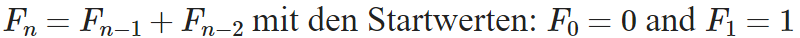

In [ ]:
def fibonacci(n):
    """ Ein Generator zum Erstellen der Fibonacci-Zahlen"""
    a, b, zähler = 0, 1, 0 # Initialisierung 
    while True:
        if (zähler > n): 
            return
        yield a
        a, b = b, a + b
        zähler += 1

### M A I N ###
f = fibonacci(10)          # Generatorobjekt (Iterator)
for x in f:
    print(x, " ", end="") # 
print()
# f = fibonacci(10)          # Generatorobjekt (Iterator)
# for i in range(12):
#     print(next(f))

In [ ]:
for x in [0 , 1 , 1 , 2 , 3 , 5 , 8 , 13 , 21 , 34 , 55  ]:
    
    print(x, ' ',end = '')

Der obige Generator kann verwendet werden, um die ersten n durch Leerzeichen getrennten Fibonacci-Zahlen oder bessere (n + 1) Zahlen zu erstellen, da auch die 0. Zahl enthalten ist. Im nächsten Beispiel stellen wir eine Version vor, die einen *endlosen Iterator* zurückgeben kann. Wir müssen bei der Verwendung dieses Iterators darauf achten, dass ein **Beendigungskriterium** verwendet wird:

In [ ]:
def fibonacci():
    """Erzeugt bei Bedarf eine unendliche Folge von Fibonacci-Zahlen"""
    a, b = 0, 1
    while True:
        yield a
        a, b = b, a + b
f = fibonacci()
#print(f)
zähler = 0
for x in f: # Endlos --> Beendigungskriterium mit break
    print(x, " ", end="")
    zähler += 1
    if (zähler > 20): 
        break 
print()

In [ ]:
# Begrenzung durch for mit range()
def all_even():
    n = 0
    while True:
        yield n
        n += 2

x = all_even()
for i in range(10):    # wir 10 mal durchlaufen --> Generator liefert endlos wird aber durch for begrenzt
    print(next(x))
print('Nächster Wert: ',next(x))


In [ ]:
next(x)

## Memory Efficient
Eine normale Funktion zur Rückgabe einer Sequenz erstellt die gesamte Sequenz im Speicher, bevor sie das Ergebnis zurückgibt. Dies ist ein Overkill, wenn die Anzahl der Elemente in der Sequenz sehr groß ist.

Die Generator implementierung solcher Sequenzen ist speicherfreundlich und wird bevorzugt, da sie jeweils nur ein Element erzeugt.

## Verwenden einer 'Return'-Anweisung in einem Generator

Seit Python 3.3 können Generatoren auch return-Anweisungen verwenden, aber ein Generator benötigt immer noch mindestens eine yield-Anweisung, um ein Generator zu sein! Eine return-Anweisung in einem Generator entspricht einer StopIteration

Schauen wir uns einen Generator an, in dem wir StopIteration explizit auslösen:

In [ ]:
def gen():
    yield 1
    #return 
    #raise StopIteration(42)
    yield 2
    print('3')
    return
g = gen()
for i in g:
    print(i)
    


In [ ]:
town = stadt_generator()
for i in town:
    print(i)

In [ ]:
town = stadt_generator()
if 'Berlin' in town:
    print('Treffer')

In [ ]:
next(town)

## Pipelining Generators
 

Mehrere Generatoren können verwendet werden, um eine Reihe von Operationen über eine Pipeline zu leiten. Dies lässt sich am besten anhand eines Beispiels veranschaulichen.

Angenommen, wir haben einen Generator, der die Zahlen der Fibonacci-Reihe erzeugt. Und wir haben einen weiteren Generator zum Quadrieren von Zahlen.

Wenn wir die Summe der Quadrate der Zahlen in der Fibonacci-Reihe herausfinden wollen, können wir dies auf folgende Weise tun, indem wir die Ausgabe der Generator funktionen zusammen pipelineing.

In [ ]:
def fibonacci_numbers(nums):
    '''
    nums --> Integer 
    
    '''
    x, y = 0, 1
    for _ in range(nums):
        x, y = y, x+y
        yield x
        
def square(nums):
    '''
    nums --> Itterationsobjekt
    
    '''
    for num in nums:
        yield num**2
        
        
print(sum(square(fibonacci_numbers(6))))  # Werte aus fibonacci --> quadrieren --> Summe bilden
print(list(fibonacci_numbers(6)))

## Python Generator Expression

Einfache Generatoren können mit Hilfe von Generatorausdrücken einfach on-the-fly erstellt werden. Es macht das Erstellen von Generatoren einfach.

Ähnlich wie die Lambda-Funktionen, die _anonyme Funktionen_ erzeugen, erzeugen Generatorausdrücke _anonyme Generatorfunktionen._

Die Syntax für Generatorausdrücke ist ähnlich wie die einer Listenauffassung in Python. Allerdings werden die eckigen Klammern durch runde Klammern ersetzt.

Der Hauptunterschied zwischen einem Listenaufruf und einem Generatorausdruck ist, dass ein Listenaufruf die gesamte Liste erzeugt, während der Generatorausdruck jeweils ein Element erzeugt.

Sie haben eine träge Ausführung (produzieren Elemente nur, wenn sie angefordert werden). Aus diesem Grund ist ein Generatorausdruck viel speichereffizienter als ein entsprechendes Listenverständnis.

In [ ]:
# Initialisieren der Liste
my_list = [1, 3, 6, 10]
# jeden Begriff mit Hilfe des Listenverständnisses quadrieren
list_ = [x**2 for x in my_list]
# Das Gleiche kann mit einem Generator-Ausdruck gemacht werden
# Generatorausdrücke sind von Klammern umgeben ()
generator = (x**2 for x in my_list)
print(list_)
print(next(generator))
#print(list(generator))
print(next(generator))
for i in generator:
    print(i)

Wir können oben sehen, dass der Generator-Ausdruck nicht sofort das gewünschte Ergebnis erzeugt hat. Stattdessen wurde ein Generatorobjekt zurückgegeben, das Elemente nur bei Bedarf produziert.

Hier sehen Sie, wie wir anfangen können, Elemente vom Generator abzurufen:

In [ ]:
# Initialize the list
my_list = [1, 3, 6, 10]
a = (x**2 for x in my_list)

for g in a:
    print(g)
# print(next(a))
# print(next(a))
# print(next(a))
# print(next(a))
# next(a)